### Import necessary packages

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tabulate import tabulate
from sklearn.neighbors import DistanceMetric

### 1.a Importing the dataset

In [2]:
dataset = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
vertebral_df = pd.DataFrame(dataset[0])

#Creating a copy of original dataset
backup_vertebral_df = vertebral_df

vertebral_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [3]:
# Unique counts 
print(vertebral_df["class"].unique())

# Shape of dataframe
vertebral_df.shape

[b'Abnormal' b'Normal']


(310, 7)

In [4]:
# Replace 'class' column in binary notation (NO = 0, AB = 1)
## i.e., Normal is tagged as Class 0, Abnormal is tagged as Class 1

for i in range(0,len(vertebral_df["class"])):
    if vertebral_df["class"][i] == b'Abnormal':
        vertebral_df["class"][i] = 1
    else:
        vertebral_df["class"][i] = 0

/var/folders/f8/857c9fm55pl4nmhsj_93hykm0000gn/T/ipykernel_22102/1780525891.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertebral_df["class"][i] = 1
/var/folders/f8/857c9fm55pl4nmhsj_93hykm0000gn/T/ipykernel_22102/1780525891.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vertebral_df["class"][i] = 0


In [5]:
vertebral_df["class"].value_counts()

1    210
0    100
Name: class, dtype: int64

### 1.b Pre-processing and Exploratory data analysis:

#### 1.b.i Scatterplots of the independent variables in the dataset. Used color to show classes 0 and 1

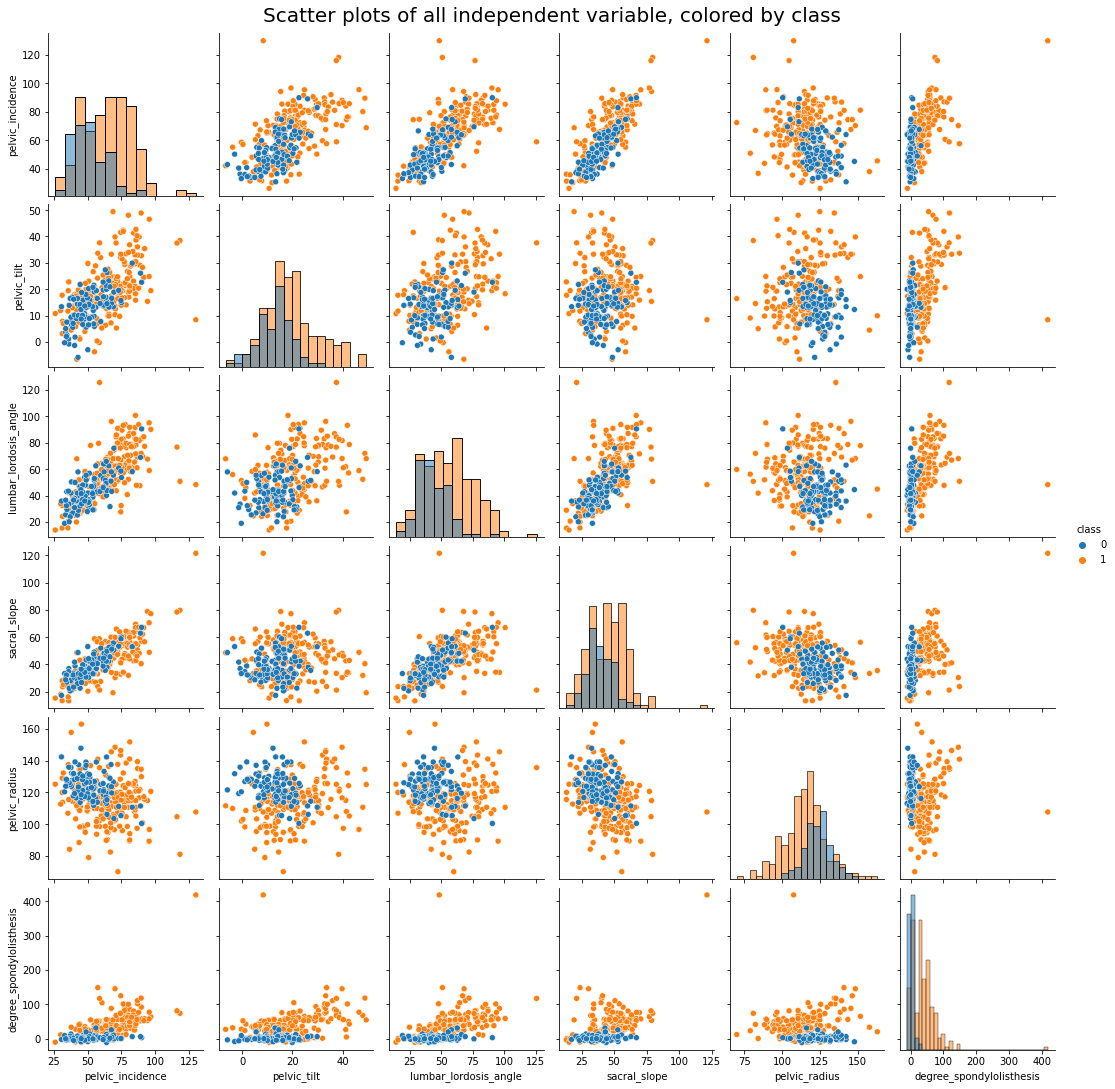

In [6]:
sns.pairplot(vertebral_df, hue='class',diag_kind='hist')
plt.suptitle('Scatter plots of all independent variable, colored by class', size = 20, y =1.01)

plt.show()

#### 1.b.ii Boxplots for each of the independent variables

In [7]:
vertebral_df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

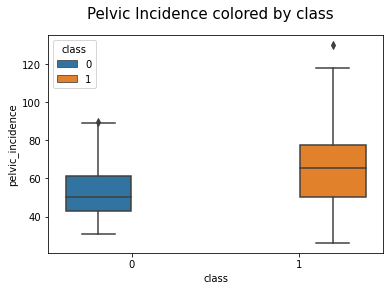

In [8]:
# Pelvic Incidence
sns.boxplot(x="class", y="pelvic_incidence", data=vertebral_df, hue = 'class')
plt.suptitle('Pelvic Incidence colored by class', size = 15)
plt.show()

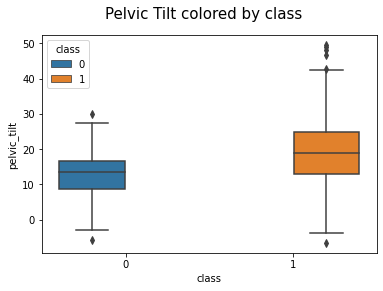

In [9]:
# Pelvic Tilt
sns.boxplot(x="class", y="pelvic_tilt", data=vertebral_df, hue = 'class')
plt.suptitle('Pelvic Tilt colored by class', size = 15)
plt.show()

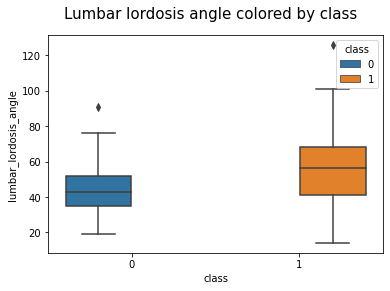

In [10]:
# Lumbar lordosis angle
sns.boxplot(x="class", y="lumbar_lordosis_angle", data=vertebral_df, hue = 'class')
plt.suptitle('Lumbar lordosis angle colored by class', size = 15)
plt.show()

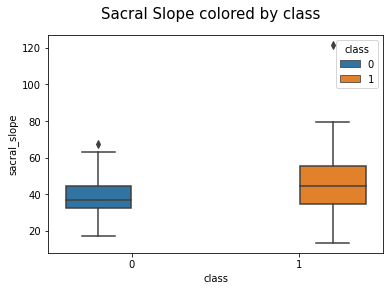

In [11]:
# Sacral Slope
sns.boxplot(x="class", y="sacral_slope", data=vertebral_df, hue = 'class')
plt.suptitle('Sacral Slope colored by class', size = 15)
plt.show()

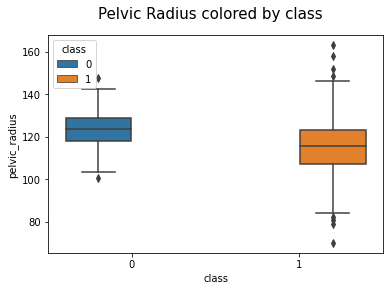

In [12]:
# Pelvic Radius
sns.boxplot(x="class", y="pelvic_radius", data=vertebral_df, hue = 'class')
plt.suptitle('Pelvic Radius colored by class', size = 15)
plt.show()

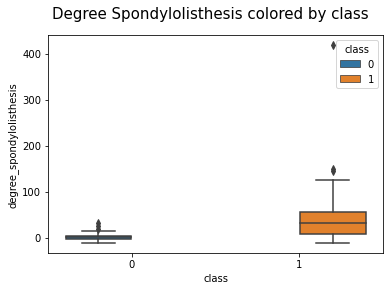

In [13]:
# Degree Spondylolisthesis
sns.boxplot(x="class", y="degree_spondylolisthesis", data=vertebral_df, hue = 'class')
plt.suptitle('Degree Spondylolisthesis colored by class', size = 15)
plt.show()

#### 1.b.iii Splitting parent dataset into test and train sets 

Selecting the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set

In [14]:
# Train data
train_p1 = vertebral_df[vertebral_df['class'] == 0].head(70)
train_p2 = vertebral_df[vertebral_df['class'] == 1].head(140)
train = pd.concat([train_p1, train_p2])
train.shape

(210, 7)

In [15]:
# Test data
test_p1 = vertebral_df[vertebral_df['class'] == 0].iloc[70:]
test_p2 = vertebral_df[vertebral_df['class'] == 1].iloc[140:]
test = pd.concat([test_p1, test_p2])
test.shape

(100, 7)

In [60]:
train

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [59]:
train[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159


In [16]:
x_train = train[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_train = train['class']

x_test = test[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_test = test['class']

In [17]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

y_train = np.asarray(y_train).tolist()
y_test = np.asarray(y_test).tolist()

### 1.c Classification using KNN

#### 1.c.i , ii  K-nearest neighbors (KNN): Euclidean distance, Majority polling

In [18]:
test_error = []
train_error = []
k = []

for i in range(208,0,-3):
    classifier = KNeighborsClassifier(n_neighbors=i, weights='uniform', p = 2) #p = 2 indicates euclidean distance
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    k.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)

train_error_eucl_maj = min(train_error)

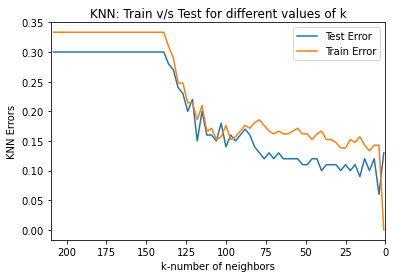

In [19]:
# Plotting the error curves for test and train datasets

plt.title('KNN: Train v/s Test for different values of k')
plt.plot(k, test_error, label='Test Error')
plt.plot(k, train_error, label='Train Error')
plt.xlim(210,0)
plt.legend()
plt.xlabel('k-number of neighbors')
plt.ylabel('KNN Errors')

plt.show()

In [20]:
min_testerror_index = test_error.index(min(test_error))
ideal_k = k[min_testerror_index]
ideal_test_error = test_error[min_testerror_index]
ideal_train_error = train_error[min_testerror_index]

In [21]:
classifier = KNeighborsClassifier(n_neighbors=ideal_k, weights='uniform', p = 2) #p = 2 indicates euclidean distance
classifier.fit(x_train,y_train)
y_test_pred = classifier.predict(x_test)

In [22]:
# Most suitable k
print(f'The most suitable value of k (number of neighbors) is: {ideal_k}')

The most suitable value of k (number of neighbors) is: 4


In [23]:
# Confusion Matrix
print(confusion_matrix(y_test, y_test_pred,labels=[1,0]))

[[69  1]
 [ 5 25]]


In [24]:
precision_k4 = 69/74
recall_k4 = 69/70

# Other metrics
print(f'True positive rate: {round(recall_k4,3)}')
print(f'True negative rate: {round(25/30,3)}')
print(f'Precision: {round(precision_k4,3)}')
print(f'F-score: {round(2*precision_k4*recall_k4/(precision_k4 + recall_k4),3)}')


True positive rate: 0.986
True negative rate: 0.833
Precision: 0.932
F-score: 0.958


#### 1.c.iii Best test error rate for size N sub-sample (Learning curve)

In [25]:
x_train_c0 = train[train['class'] == 0][['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
x_train_c1 = train[train['class'] == 1][['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]

y_train_c0 = train[train['class'] == 0]['class']
y_train_c1 = train[train['class'] == 1]['class']

In [26]:
k_ideal_n = []
cycle_test_error = []
N = list(range(10,211,10))
sample_size = []

for n in range(10,211,10):
    
    x_train_n = pd.concat([x_train_c0.iloc[:int(n/3)],x_train_c1.iloc[:(n - int(n/3))]])
    y_train_n = pd.concat([y_train_c0.iloc[:int(n/3)],y_train_c1.iloc[:(n - int(n/3))]])

    x_train_n = np.asarray(x_train_n)
    y_train_n = np.asarray(y_train_n).tolist()
    
    n_ideal_score = []
    train_error_n = []
    test_error_n = []
    k_new = []
    sample_size.append(n)
    
    for i in range(1,n,5):
        n_classifier = KNeighborsClassifier(n_neighbors=i, weights='uniform', p = 2)
        n_classifier.fit(x_train_n,y_train_n)
        y_test_pred_n = classifier.predict(x_test)
        k_new.append(i)

        #Model score on train data
        train_model_score_n = n_classifier.score(x_train_n, y_train_n)
        train_error_n.append(1 - train_model_score_n)

        #Model score on test data
        test_model_score_n = n_classifier.score(x_test, y_test)
        test_error_n.append(1 - test_model_score_n)
        
    min_testerror_index_n = test_error_n.index(min(test_error_n))
    k_ideal_n.append(k[min_testerror_index_n])
    cycle_test_error.append(min(test_error_n))

train_error_eucl_maj_nsample = min(train_error_n)

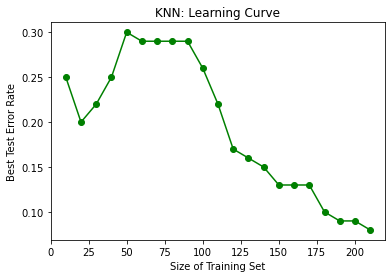

In [27]:
# Plotting the learning curve

plt.title('KNN: Learning Curve')
plt.plot(N, cycle_test_error, 'go-')
plt.xlabel('Size of Training Set')
plt.ylabel('Best Test Error Rate')
plt.show()

In [28]:
# Least error
print(f'The best test error rate is: {round(min(cycle_test_error),2)}')

# Associated sample size 
print(f'The associated sample size is: {sample_size[cycle_test_error.index(min(cycle_test_error))]}')


The best test error rate is: 0.08
The associated sample size is: 210


### 1.d Replacing Euclidenan metric with the following:

#### 1.d.i.A KNN: Manhattan Distance, Majority Polling

In [29]:
test_error = []
train_error = []
k = []

for i in range(1,200,5):
    classifier = KNeighborsClassifier(n_neighbors=i, weights='uniform', p = 1)
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    k.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)

train_error_manh_maj = min(train_error)

In [30]:
# Tabulating test error, k

pd.DataFrame({'K' : k, 'Test Error' : test_error})
#print(tabulate(tab_dA,headers = ['k','Test Error']))

,K,Test Error
0,1,0.11
1,6,0.11
2,11,0.11
3,16,0.12
4,21,0.12
5,26,0.11
6,31,0.12
7,36,0.13
8,41,0.13
9,46,0.13


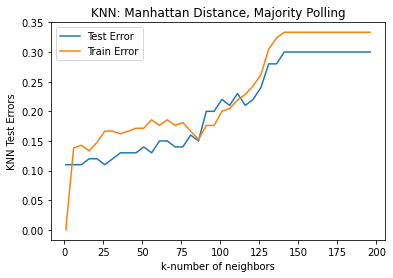

In [31]:
# Plotting the error curves for test and train datasets

plt.title('KNN: Manhattan Distance, Majority Polling')
plt.plot(k, test_error, label='Test Error')
plt.plot(k, train_error, label='Train Error')
plt.legend()
plt.xlabel('k-number of neighbors')
plt.ylabel('KNN Test Errors')

plt.show()

In [32]:
#Get minimum test error 
min_test_error_dA = min(test_error)
dA_error_indexes = []

# Calculate all cases where test error is mimimum
for i in range(len(test_error)):
    if test_error[i] == min_test_error_dA:
        dA_error_indexes.append(i)

# Get all relevant k values for the minimum test error
min_k_dA = [k[m] for m in dA_error_indexes]

# Choosing the highest k as the best, as by theory a higher k value is better 
# Also, the ideal k is generally found somewhere around the square root of the sample size

k_ideal_dA = max(min_k_dA)

print(f'The best value of k value is: {k_ideal_dA}')

The best value of k value is: 26


#### 1.d.i.B KNN: Log p values (Minkowski Distance), Majority Polling for k = 26

In [33]:
range_dB = [round(i* 0.1,2) for i in range(1, 11)]

test_error = []
train_error = []
p = []

for i in range_dB:
    classifier = KNeighborsClassifier(n_neighbors=26 ,weights='uniform', p = 10**i)
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    p.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)
    
train_error_mink_maj = min(train_error)

In [34]:
# Tabulating test error, k
pd.DataFrame({'log P' : range_dB, 'Test Error' : test_error})

,log P,Test Error
0,0.1,0.10
1,0.2,0.10
2,0.3,0.11
3,0.4,0.10
4,0.5,0.11
5,0.6,0.10
6,0.7,0.11
7,0.8,0.11
8,0.9,0.11
9,1.0,0.11


In [35]:
# Best p for k = 26
print(f'The best p for k = 26 is: {p[test_error.index(min(test_error))]}')

# Least error
print(f'The least test error is: {round(min(test_error),2)}')

The best p for k = 26 is: 0.1
The least test error is: 0.1


#### 1.d.i.C KNN: Chebyshev distance, Majority Polling

In [36]:
test_error = []
train_error = []
k = []

for i in range(1,200,5):
    classifier = KNeighborsClassifier(n_neighbors=i, weights='uniform', p = float('inf'))
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    k.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)

train_error_cheb_maj = min(train_error)

In [37]:
# Best k value
print(f'The best of k is: {k[test_error.index(min(test_error))]}')

# Least error
print(f'The least test error is: {round(min(test_error),2)}')

The best of k is: 16
The least test error is: 0.08


In [38]:
# Tabulating test error, k
pd.DataFrame({'k' : k, 'Test Error' : test_error})

,k,Test Error
0,1,0.13
1,6,0.10
2,11,0.12
3,16,0.08
4,21,0.11
5,26,0.12
6,31,0.12
7,36,0.10
8,41,0.13
9,46,0.12


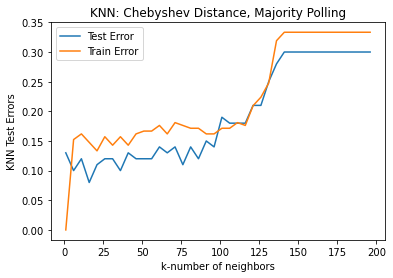

In [39]:
# Plotting the error curves for test and train datasets

plt.title('KNN: Chebyshev Distance, Majority Polling')
plt.plot(k, test_error, label='Test Error')
plt.plot(k, train_error, label='Train Error')
plt.legend()
plt.xlabel('k-number of neighbors')
plt.ylabel('KNN Test Errors')

plt.show()

#### 1.d.ii KNN: Mahalanobis Distance, Majority Polling

In [58]:
pd.DataFrame(x_train)

,0,1,2,3,4,5
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910
...,...,...,...,...,...,...
205,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
206,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083
207,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096
208,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159


In [53]:
# Calculating covaraince of train dataset
covX = np.cov(x_train,rowvar=False)
covX_inv = np.linalg.pinv(covX)

# KNN Model
test_error = []
train_error = []
k = []

for i in range(1,200,5):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', weights='uniform', metric_params={'VI': covX_inv})
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    k.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)
    
train_error_mahl_maj = min(train_error)

In [54]:
# Best k value
print(f'The best of k is: {k[test_error.index(min(test_error))]}')

# Least error
print(f'The least test error is: {round(min(test_error),2)}')

The best of k is: 1
The least test error is: 0.15


In [42]:
# Tabulating test error, k
pd.DataFrame({'k' : k, 'Test Error' : test_error})

,k,Test Error
0,1,0.15
1,6,0.16
2,11,0.18
3,16,0.17
4,21,0.20
5,26,0.17
6,31,0.21
7,36,0.21
8,41,0.19
9,46,0.22


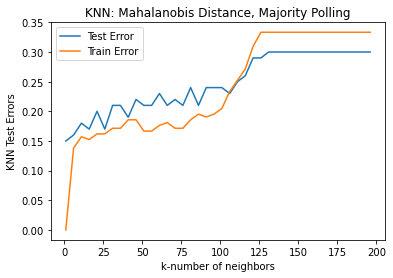

In [43]:
# Plotting the error curves for test and train datasets

plt.title('KNN: Mahalanobis Distance, Majority Polling')
plt.plot(k, test_error, label='Test Error')
plt.plot(k, train_error, label='Train Error')
plt.legend()
plt.xlabel('k-number of neighbors')
plt.ylabel('KNN Test Errors')

plt.show()

### 1.e

#### KNN: Euclidean distance, weighted decision

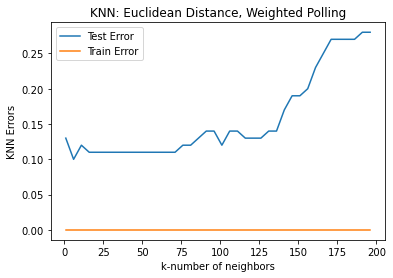

In [44]:
test_error = []
train_error = []
k = []

for i in range(1,200,5):
    classifier = KNeighborsClassifier(n_neighbors=i, weights='distance', p = 2)
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    k.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)

train_error_eucl_wtd = min(train_error)

# Plotting the error curves for test and train datasets

plt.title('KNN: Euclidean Distance, Weighted Polling')
plt.plot(k, test_error, label='Test Error')
plt.plot(k, train_error, label='Train Error')
plt.legend()
plt.xlabel('k-number of neighbors')
plt.ylabel('KNN Errors')

plt.show()

In [45]:
# Best k value
print(f'The best of k is: {k[test_error.index(min(test_error))]}')

# Least error
print(f'The least test error is: {round(min(test_error),2)}')

The best of k is: 6
The least test error is: 0.1


#### KNN: Manhattan distance, weighted decision

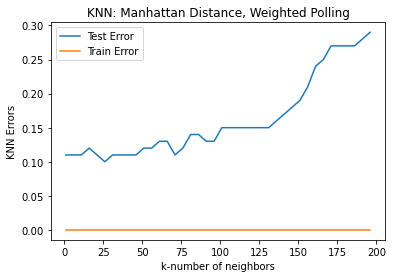

In [46]:
test_error = []
train_error = []
k = []

for i in range(1,200,5):
    classifier = KNeighborsClassifier(n_neighbors=i, weights='distance', p = 1)
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    k.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)
    
train_error_manh_wtd = min(train_error)

# Plotting the error curves for test and train datasets

plt.title('KNN: Manhattan Distance, Weighted Polling')
plt.plot(k, test_error, label='Test Error')
plt.plot(k, train_error, label='Train Error')
plt.legend()
plt.xlabel('k-number of neighbors')
plt.ylabel('KNN Errors')

plt.show()

In [47]:
# Best k value
print(f'The best of k is: {k[test_error.index(min(test_error))]}')

# Least error
print(f'The least test error is: {round(min(test_error),2)}')

The best of k is: 26
The least test error is: 0.1


#### KNN: Chebyshev distance, weighted decision

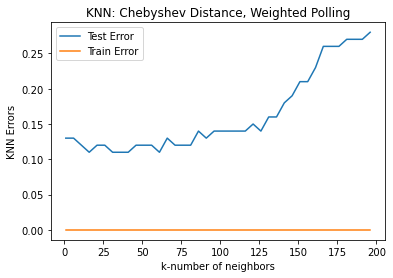

In [48]:
test_error = []
train_error = []
k = []

for i in range(1,200,5):
    classifier = KNeighborsClassifier(n_neighbors=i, weights='distance', p = float('inf'))
    classifier.fit(x_train,y_train)
    y_test_pred = classifier.predict(x_test)
    k.append(i)
    
    #Model score on train data
    train_model_score = classifier.score(x_train, y_train)
    train_error.append(1 - train_model_score)
    
    #Model score on test data
    test_model_score = classifier.score(x_test, y_test)
    test_error.append(1 - test_model_score)

train_error_cheb_wtd = min(train_error)

# Plotting the error curves for test and train datasets

plt.title('KNN: Chebyshev Distance, Weighted Polling')
plt.plot(k, test_error, label='Test Error')
plt.plot(k, train_error, label='Train Error')
plt.legend()
plt.xlabel('k-number of neighbors')
plt.ylabel('KNN Errors')

plt.show()

In [49]:
# Best k value
print(f'The best of k is: {k[test_error.index(min(test_error))]}')

# Least error
print(f'The least test error is: {round(min(test_error),2)}')

The best of k is: 16
The least test error is: 0.11


### 1.f Lowest training error rate

In [50]:
best_train_error_overall = min(train_error_eucl_maj
                                ,train_error_eucl_maj_nsample
                                ,train_error_manh_maj
                                ,train_error_mink_maj
                                ,train_error_cheb_maj
                                ,train_error_mahl_maj
                                ,train_error_eucl_wtd
                                ,train_error_manh_wtd
                                ,train_error_cheb_wtd)

In [51]:
print(f'The lowest training error rate achieved in all the above models is: {best_train_error_overall}')

The lowest training error rate achieved in all the above models is: 0.0


## Sources
 1. https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
 2. https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
 3. https://www.educba.com/python-print-table/
 4. https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
 5. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html